In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [7]:
from google.colab import files
uploaded = files.upload()

Saving 16900.csv to 16900.csv


In [8]:
df = pd.read_csv("16900.csv")

country                  0
adjusted_satisfaction    0
avg_satisfaction         0
std_satisfaction         0
avg_income               0
median_income            0
income_inequality        0
region                   0
happyScore               0
GDP                      0
country.1                0
dtype: int64


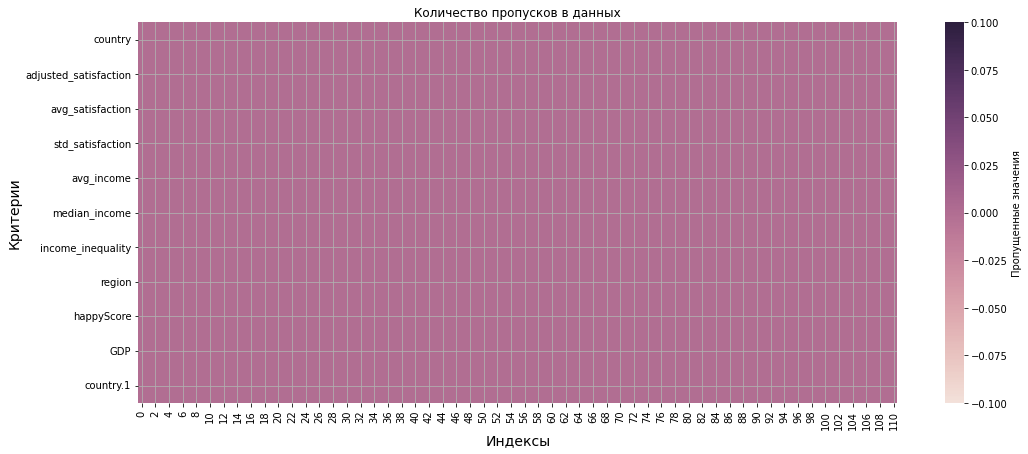

In [9]:
print(df.isna().sum())
plt.figure(figsize=(17,7))
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
sns.heatmap(df.isna().transpose(), cmap=cmap, cbar_kws={'label': 'Пропущенные значения'})
plt.xlabel("Индексы", fontsize=14)  
plt.ylabel("Критерии", fontsize=14)
plt.title("Количество пропусков в данных")
plt.grid()
plt.show()

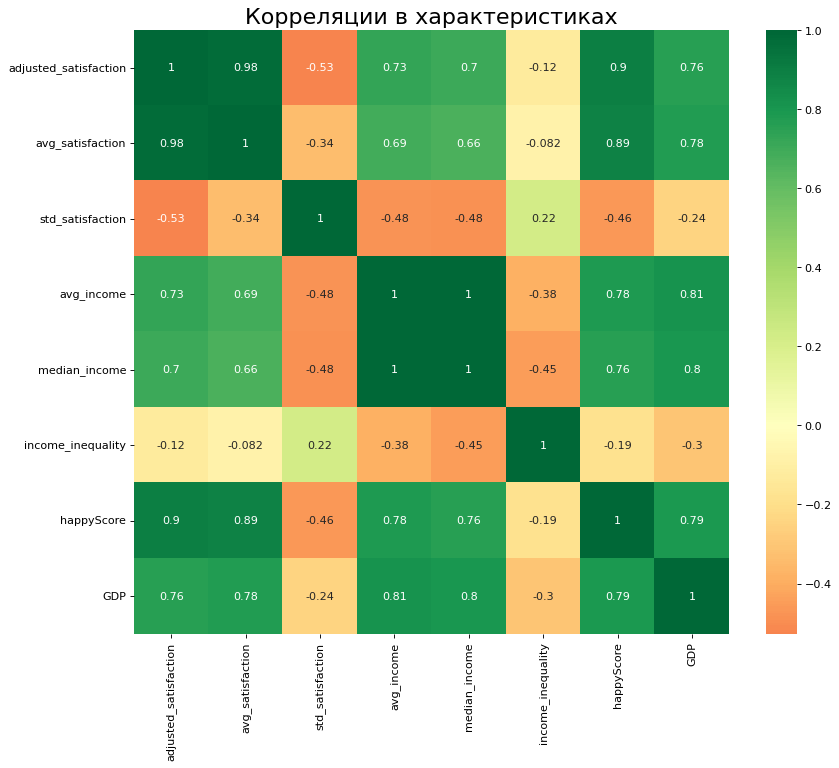

In [10]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Корреляции в характеристиках', fontsize=20)
plt.show()

In [11]:
y=df['avg_satisfaction']
x=df.drop(['avg_satisfaction','country','country.1','region',], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')
model = LinearRegression()
model.fit(X_train, y_train)
w0 = model.intercept_
w1 = model.coef_
print('Веса всех признаков (w1): ', model.coef_)
print('Свободный коэффицент уравнения w0:', model.intercept_)
y_pred = model.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Train dataset size: (77, 7), (77,)
Test dataset size: (34, 7), (34,)
Веса всех признаков (w1):  [ 1.21935588e-01  1.03976534e+00  9.29231664e-06 -1.00040816e-05
 -2.63640584e-04 -9.40275160e-03 -1.66135856e-02]
Свободный коэффицент уравнения w0: -2.1482318765733304
Mean Absolute Error: 0.0338593599784751
Mean Squared Error: 0.0018151877987498777
R2 score: 0.9988758460013849


In [12]:
print('Веса всех признаков (w1): ', model.coef_)
print('Свободный коэффицент уравнения w0:', model.intercept_)

Веса всех признаков (w1):  [ 1.21935588e-01  1.03976534e+00  9.29231664e-06 -1.00040816e-05
 -2.63640584e-04 -9.40275160e-03 -1.66135856e-02]
Свободный коэффицент уравнения w0: -2.1482318765733304


In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.0462770980832517
Mean Squared Error: 0.003121529588101118
R2 score: 0.9979226701108499


In [17]:
y=df['happyScore']
x=df.drop(['happyScore','country','country.1','region',], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')
model = LinearRegression()
model.fit(X_train, y_train)
w0 = model.intercept_
w1 = model.coef_
print('Веса всех признаков (w1): ', model.coef_)
print('Свободный коэффицент уравнения w0:', model.intercept_)
y_pred = model.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))
print('Веса всех признаков (w1): ', model.coef_)
print('Свободный коэффицент уравнения w0:', model.intercept_)

Train dataset size: (77, 7), (77,)
Test dataset size: (34, 7), (34,)
Веса всех признаков (w1):  [ 2.09963975e-01 -1.18953366e+00  1.19484312e+00  2.98260920e-04
 -3.20810882e-04 -1.08533702e-02  2.84194042e-01]
Свободный коэффицент уравнения w0: -0.30853568553158084
Mean Absolute Error: 0.4506712508027799
Mean Squared Error: 0.3449711566049255
R2 score: 0.7530226910722092
Веса всех признаков (w1):  [ 2.09963975e-01 -1.18953366e+00  1.19484312e+00  2.98260920e-04
 -3.20810882e-04 -1.08533702e-02  2.84194042e-01]
Свободный коэффицент уравнения w0: -0.30853568553158084


In [42]:
cols=x.columns
for i in range(len(w1)):
  print(str(w1[i]), cols[i])

0.20996397497731548 adjusted_satisfaction
-1.1895336635455533 avg_satisfaction
1.194843124205949 std_satisfaction
0.0002982609196895414 avg_income
-0.00032081088235791366 median_income
-0.01085337018804807 income_inequality
0.2841940418960827 GDP


In [48]:
df1=df.drop(['country','country.1','region',], axis=1)
y1=df['std_satisfaction']
x1=df.drop(['std_satisfaction','country','country.1','region',], axis=1)
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3)
print(f'Train dataset size: {X1_train.shape}, {y1_train.shape}')
print(f'Test dataset size: {X1_test.shape}, {y1_test.shape}')
model = LinearRegression()
model.fit(X1_train, y1_train)
w0 = model.intercept_
w1 = model.coef_
print('Веса всех признаков (w1): ', model.coef_)
print('Свободный коэффицент уравнения w0:', model.intercept_)
y1_pred = model.predict(X1_test)
print('Mean Absolute Error:', mean_absolute_error(y1_test, y1_pred))
print('Mean Squared Error:', mean_squared_error(y1_test, y1_pred))
print('R2 score:', r2_score(y1_test, y1_pred))
print('Веса всех признаков (w1): ', model.coef_)
print('Свободный коэффицент уравнения w0:', model.intercept_)

Train dataset size: (77, 7), (77,)
Test dataset size: (34, 7), (34,)
Веса всех признаков (w1):  [-1.14233234e-01  9.40000781e-01 -1.95277275e-05  2.14036562e-05
  1.17145219e-03  1.10073958e-03  2.69319894e-02]
Свободный коэффицент уравнения w0: 2.0528184469542707
Mean Absolute Error: 0.028782971726518003
Mean Squared Error: 0.0013813035967372206
R2 score: 0.9833559839121655
Веса всех признаков (w1):  [-1.14233234e-01  9.40000781e-01 -1.95277275e-05  2.14036562e-05
  1.17145219e-03  1.10073958e-03  2.69319894e-02]
Свободный коэффицент уравнения w0: 2.0528184469542707


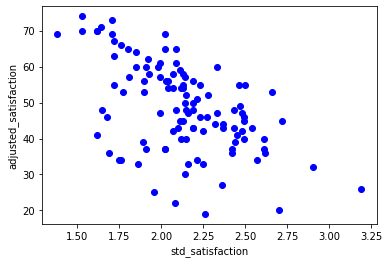

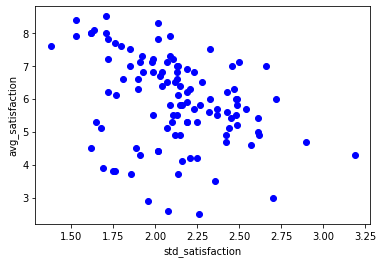

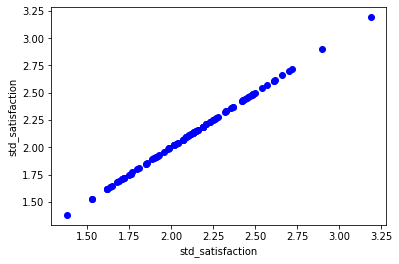

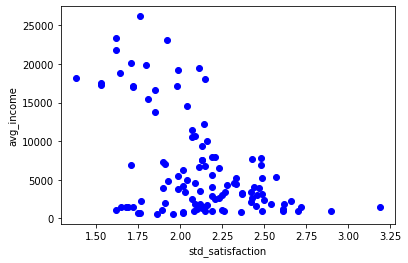

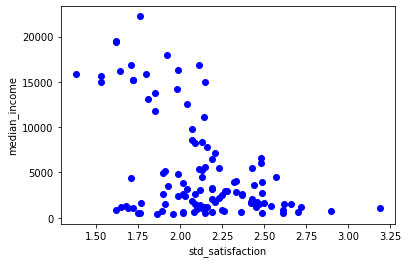

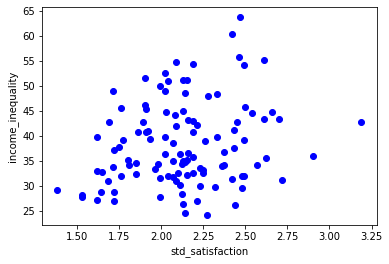

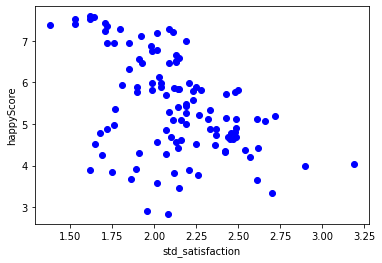

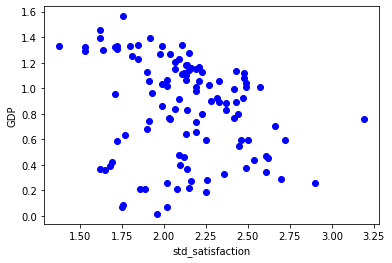

In [50]:
for column in df1.columns:
  fig, ax = plt.subplots()
  plt.xlabel('std_satisfaction')        
  plt.ylabel(column)
  ax.scatter(df1['std_satisfaction'], df1[column], c = 'blue')
  plt.show()

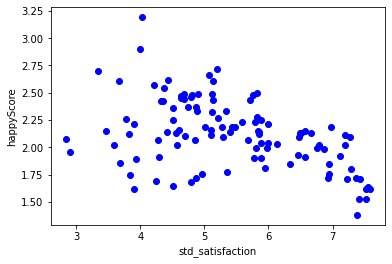

In [63]:
fig, ax = plt.subplots()
plt.xlabel('std_satisfaction')        
plt.ylabel("happyScore")
#plt.plot(df1["std_satisfaction"], df1['happyScore'], color='red', linewidth=2);
ax.scatter(df1['happyScore'], df1["std_satisfaction"], c = 'blue')
plt.show()

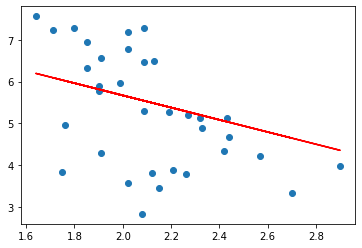

In [70]:
x1=df[['std_satisfaction']]
y1=df['happyScore']
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3)
model = LinearRegression()
model.fit(X1_train, y1_train)
w0 = model.intercept_
w1 = model.coef_
y1_pred = model.predict(X1_test)
plt.scatter(X1_test, y1_test)
plt.plot(X1_test, y1_pred, color='red', linewidth=2)
plt.show()